# **Dataset Overview:**

The dataset contains information about retail transactions, likely from an online retail store.
Each row represents an individual item within an invoice, capturing details such as product information, quantity, pricing, and customer-related information.

dataset link : https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering?resource=download
# **Key Columns:**

**InvoiceNo:** Unique identifier for each invoice.                  
**StockCode:** Code identifying the product.                       
**Description:**  A brief description of the product.                            
**Quantity:** The quantity of the product in the invoice.          
**InvoiceDate:**  Date and time when the invoice was generated.     
**UnitPrice:** The price per unit of the product.                  
**CustomerID:** Unique identifier for the customer.                
**Country:**The country where the transaction took place.

# Data Exploration:

Checked the encoding of the data using chardet.
Loaded the data into a Pandas DataFrame.
Checked basic information about the dataset using info() and describe().
Handled missing values and converted data types where needed.
#Data Handling:

Converted the 'UnitPrice' column to numeric.
Converted 'InvoiceDate' to a datetime object.
Dropped rows with missing values in 'Description' and 'Country'.
Filled missing values in 'CustomerID' with 0.
# Descriptive Analysis:

Provided summary statistics using describe().
# Importing Libraries for KMeans:

Imported necessary libraries for clustering.
Feature Selection and Standardization:

Selected relevant columns ('Quantity' and 'UnitPrice').
Standardized the features using StandardScaler.
# Elbow Method for Optimal Clusters:

Used the Elbow method to determine the optimal number of clusters.
# KMeans Clustering:

Trained a KMeans clustering model with the chosen number of clusters (k=4).
# Inspecting the Results:

Displayed the cluster centers.
# Visualizations:

Plotted a scatter plot to visualize the clusters.
# Model Inertia:

Checked the inertia of the trained model.
# Evaluation with New Data:

Used the trained model to predict clusters for new data.
# Saving the Model:

Saved the trained KMeans model using joblib.

# **Importing the Pandas and Numpy for Analysis**

In [1]:
import pandas as pd
import numpy as np

# **Using Chartdet to find the Encoding of the large data**

In [2]:
import chardet
filepath='/content/OnlineRetail.csv'
with open(filepath, 'rb') as file:
    result = chardet.detect(file.read())
    encoding_detected = result['encoding']

print(f"Detected encoding: {encoding_detected}")


Detected encoding: ISO-8859-1


# **Reading the data with character encoding **

 It is a crucial aspect of working with text data, and specifying the correct encoding provides numerous benefits, including accurate character representation, support for special characters, internationalization, compatibility, error prevention, data integrity, and standardization.

In [3]:
data = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1', error_bad_lines=False)

<ipython-input-3-20eaafde5e7d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1', error_bad_lines=False)


# **Data Exploration**

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
data.shape

(541909, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Data Handling**

In [8]:
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')


In [10]:
data.dropna(subset=['Description', 'Country'], inplace=True)

In [11]:
data.fillna({'CustomerID': 0}, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


# **Descriptive Analysis**

In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,11507.851471
std,218.007598,96.889628,6760.792031
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12367.000000
50%,3.000000,2.080000,14390.000000
75%,10.000000,4.130000,16261.000000
max,80995.000000,38970.000000,18287.000000


# **Importing Libraries to train Kmeans Clustering Model**

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# **Feature Selection and Standardization**

In [15]:
# Selecting relevant columns for clustering
X = data[['Quantity', 'UnitPrice']]

In [16]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Elbow Method to find Optimal CLusters**

In [17]:
# This involves fitting KMeans models with different values of k and plotting the inertia (within-cluster sum of squares)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

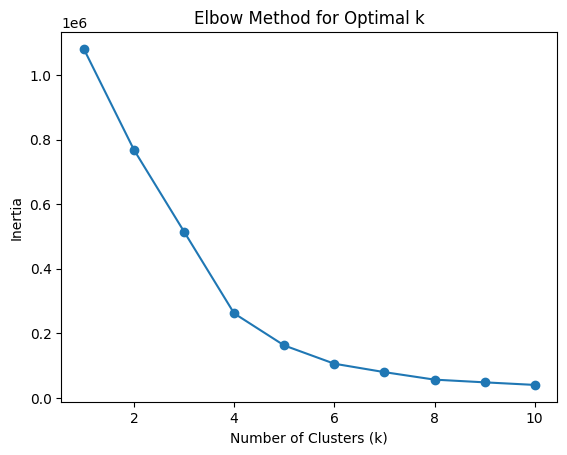

In [18]:
# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# **Elbow at k=4**

In [19]:
# Elbow method,for choosing the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Inspecting the results**

In [20]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Quantity', 'UnitPrice'])
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
       Quantity    UnitPrice
0      9.603797     4.065642
1 -77605.000000     1.560000
2     -0.806452  9730.436452
3  77605.000000     1.560000


# **Visualizations for Analysis**

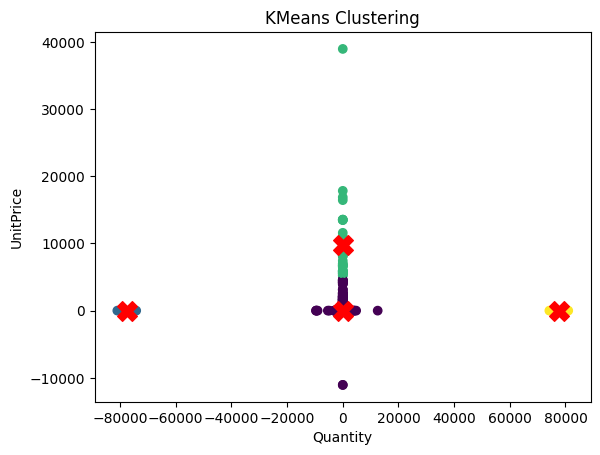

In [22]:
# Visualizing the clusters between 'Quantity'and 'UnitPrice'
plt.scatter(X['Quantity'], X['UnitPrice'], c=data['Cluster'], cmap='viridis')
plt.scatter(cluster_centers['Quantity'], cluster_centers['UnitPrice'], marker='X', c='red', s=200)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('KMeans Clustering')
plt.show()

# **Models Inertia **
The inertia is minimized for a reasonable number of clusters

In [23]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 261658.47195768228


# **Evaluation**

In [24]:
import pandas as pd

# Sample new data with the same features as  original data
new_data = pd.DataFrame({
    'Quantity': [10, 5, 15],
    'UnitPrice': [3.0, 2.5, 4.0]
})

# scaling the new data similarly
new_data_scaled = scaler.transform(new_data)

# Trained KMeans model to predict clusters for the new data
new_data['Cluster'] = kmeans.predict(new_data_scaled)

print(new_data)


   Quantity  UnitPrice  Cluster
0        10        3.0        0
1         5        2.5        0
2        15        4.0        0


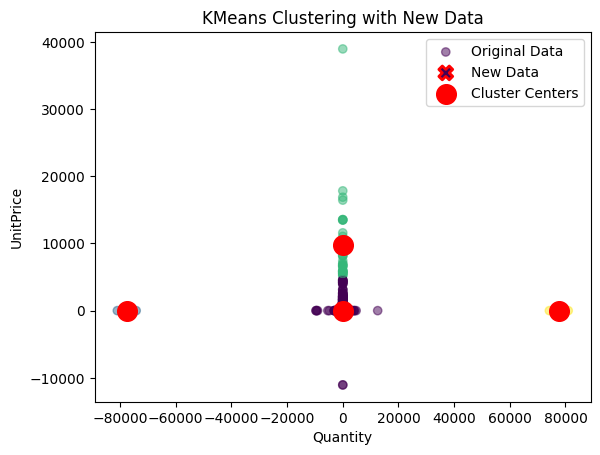

In [25]:
# Scatter plot of the original data points
plt.scatter(X['Quantity'], X['UnitPrice'], c=data['Cluster'], cmap='viridis', alpha=0.5, label='Original Data')

# Scatter plot of the new data points with cluster assignments
plt.scatter(new_data['Quantity'], new_data['UnitPrice'], c=new_data['Cluster'], marker='X', s=100, edgecolors='red', linewidths=2, label='New Data')
plt.scatter(cluster_centers['Quantity'], cluster_centers['UnitPrice'], marker='o', c='red', s=200, label='Cluster Centers')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('KMeans Clustering with New Data')
plt.legend()
plt.show()

# **END**

# **Saving the Model**

In [26]:
import joblib
model_filename = 'kmeans_model.joblib'

# Save the model to a file
joblib.dump(kmeans, model_filename)

print(f"Model saved to {model_filename}")


Model saved to kmeans_model.joblib
